# Time series basics

A special kind of the data are time series. They are built from the value of a measurement collected at constant time intervals. Typically, they are analyzer in order to find some trends and predict future values in given point of time.

There are two important concepts when it comes to data series: **trend** and **seasonality**.

During our workshop we are going to use a standard stack for time series analysis in Python:
- pandas
- matplotlib (for visualization)


In [44]:
%matplotlib inline

from IPython.display import display

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Example 01 - Sales of shampoo over a three year period

For this example we use [sales data](https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period#!ds=22r0&display=line).

In [31]:
shampoo_sales_df = pd.read_csv("data/sales-of-shampoo-over-a-three-ye.csv", delimiter=",")
shampoo_sales_df.columns = ("Month", "Value")
display(shampoo_sales_df)

,Month,Value
0,2001-01,266.0
1,2001-02,145.9
2,2001-03,183.1
3,2001-04,119.3
4,2001-05,180.3
5,2001-06,168.5
6,2001-07,231.8
7,2001-08,224.5
8,2001-09,192.8
9,2001-10,122.9


As the dataset consists of two columns, we need to make one of them an index, and use another one as a value.

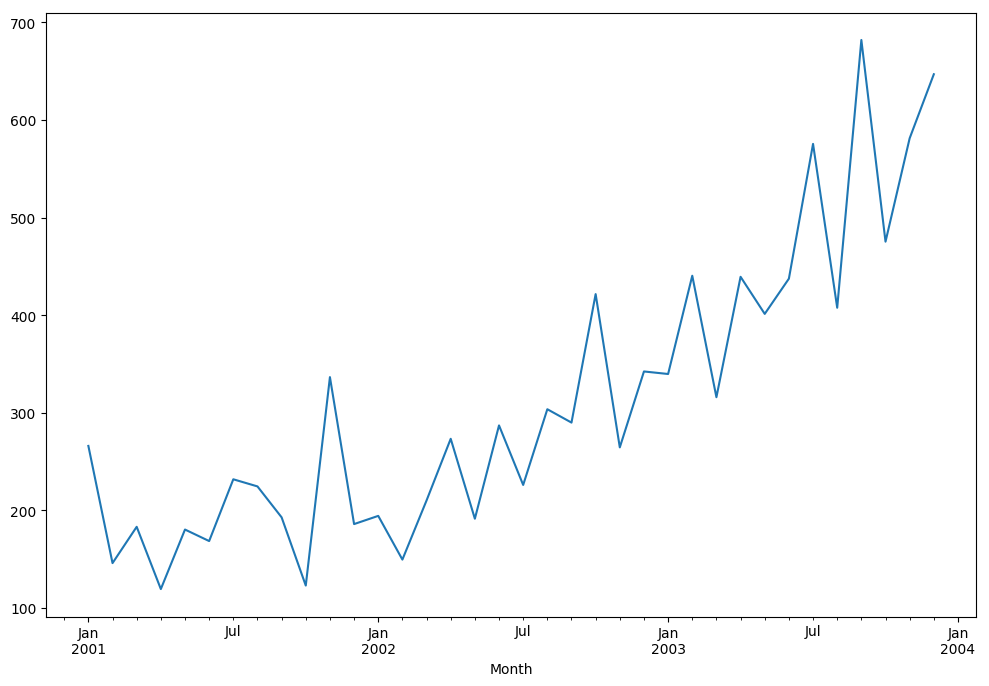

In [32]:
# Use a column "Month" as a dataframe index, but convert them from strings
# to datetime representation which simplifies further work with pandas
shampoo_sales_df.index = shampoo_sales_df["Month"].map(pd.to_datetime)
shampoo_sales_series = shampoo_sales_df["Value"]
# Display the plot of shampoo sales value
shampoo_sales_series.plot()

The plot visualizes a global trend, which is increasing. Probably there are some seasonalities as well. 

## Example 02 - Handling missing values

Perfectly, our dataset should contain the values for all the points of time, but due to different issues, it is not always true. There are several scenarios how to deal with such missing values, for instance:
- interpolation
- last observation carried forward (LOCF)
- next observation carried backward (NOCB)

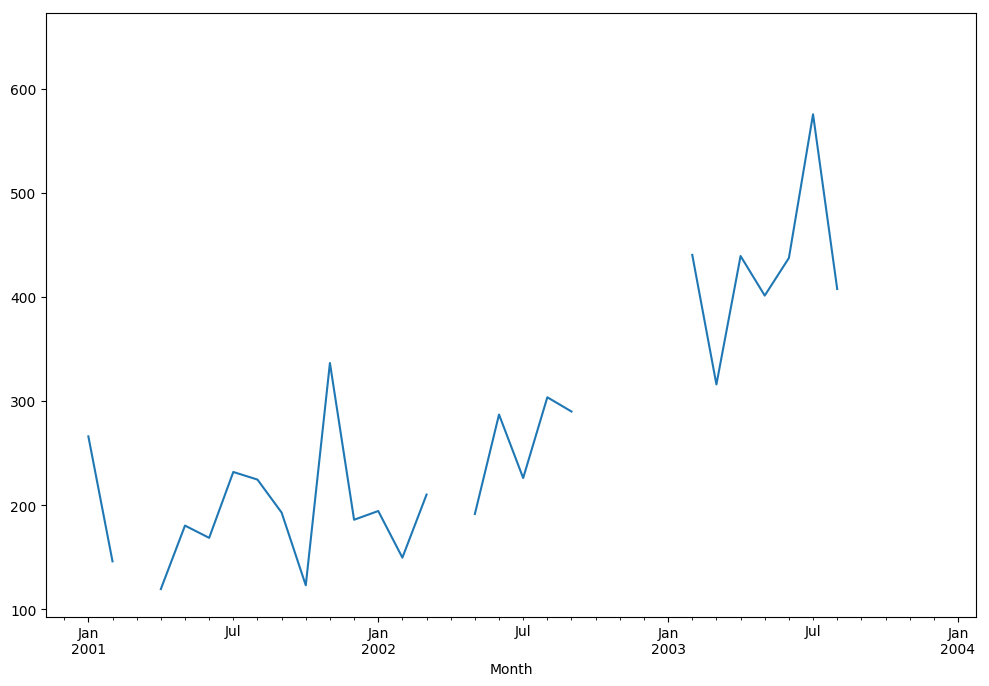

In [40]:
# Remove some of the observations from the original time series, by setting the values of NaN
incomplete_sales_series = shampoo_sales_series.copy()
for index in (2, 15, 21, 22, 23, 24, 32, 34):
    incomplete_sales_series[index] = np.NaN
incomplete_sales_series.plot()

### Interpolation
Interpolation tries to find the missing value by creating a function which tries to pretend the original observation. The simplest case is a *linear interpolation* which uses a linear function using the last and the next known values and take its value in the missing points of time.

### Last observation carried forward
The missing value is filled with the last known one.

### Next observation carried backward
The missing value is filled with the next known one.

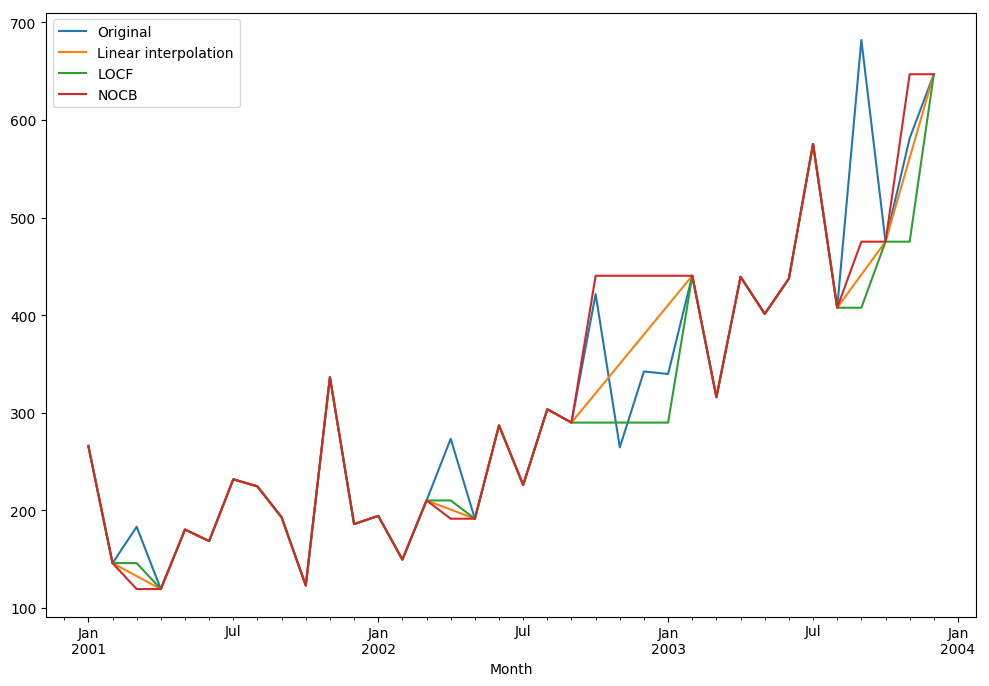

In [58]:
# Fill the missing values with different strategies
interpolated_sales_series = incomplete_sales_series.interpolate(method="linear")
locf_sales_series = incomplete_sales_series.fillna(method="pad")
nocb_sales_series = incomplete_sales_series.fillna(method="backfill")
# Display all the results on a single plot for comparison
shampoo_sales_series.plot(legend=True, label="Original")
interpolated_sales_series.plot(legend=True, label="Linear interpolation")
locf_sales_series.plot(legend=True, label="LOCF")
nocb_sales_series.plot(legend=True, label="NOCB")